<a href="https://colab.research.google.com/github/ahmedshaik982/Cardiovascular_Risk_Prediction/blob/main/Cardiovascular_Risk_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

**The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.**

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.5f}'.format


In [2]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading the data and displaying the top 5 rows of the data
data = pd.read_csv('/content/drive/My Drive/files/cardiovascular_risk.csv')
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.00000,F,YES,3.00000,0.00000,0,0,0,221.00000,148.00000,85.00000,NaN,90.00000,80.00000,1
1,1,36,4.00000,M,NO,0.00000,0.00000,0,1,0,212.00000,168.00000,98.00000,29.77000,72.00000,75.00000,0
2,2,46,1.00000,F,YES,10.00000,0.00000,0,0,0,250.00000,116.00000,71.00000,20.35000,88.00000,94.00000,0
3,3,50,1.00000,M,YES,20.00000,0.00000,0,1,0,233.00000,158.00000,88.00000,28.26000,68.00000,94.00000,1
4,4,64,1.00000,F,YES,30.00000,0.00000,0,0,0,241.00000,136.50000,85.00000,26.42000,70.00000,77.00000,0


In [4]:
#shape of the data
data.shape

(3390, 17)

The data has 3390 rows and 17 columns

##**Feature description :** 


*   **id** : unique id of a person

*   **age** : Age of the patient

*   **education** :

*   **sex** : male or female

*   **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO")

*   **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

*  **BP Meds**: whether or not the patient was on blood pressure medication (Nominal)

*   **Prevalent Stroke**: whether or not the patient had previously had a stroke (Nominal)
*   **Prevalent Hyp**: whether or not the patient was hypertensive (Nominal)


*   **Diabetes**: whether or not the patient had diabetes (Nominal)


*   **Tot Chol**: total cholesterol level (Continuous)


*   **Sys BP**: systolic blood pressure (Continuous)


*   **Dia BP**: diastolic blood pressure (Continuous)


*   **BMI**: Body Mass Index (Continuous)


*   **Heart Rate**: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)


*   **Glucose**: glucose level (Continuous)



*   **TenYearCHD** : 10 year risk of coronary heart disease (1 - Yes, 0 - No)






In [5]:
# Checking info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [6]:
# Checking for duplicated values
data.duplicated().sum()

0

Hence, the data has zero duplicated values

In [7]:
# Checking for null values
data.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In the data, there are 7 features with null values.

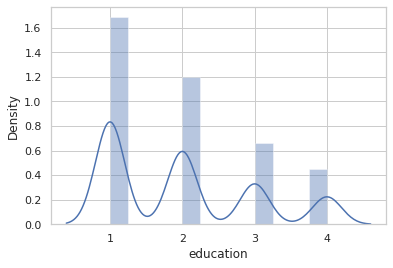

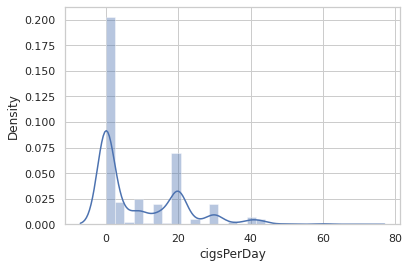

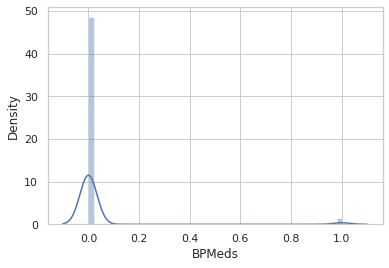

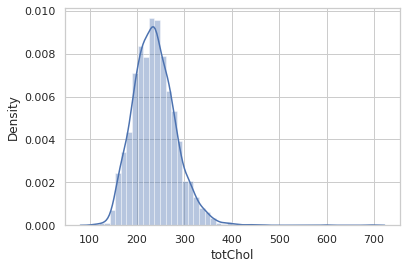

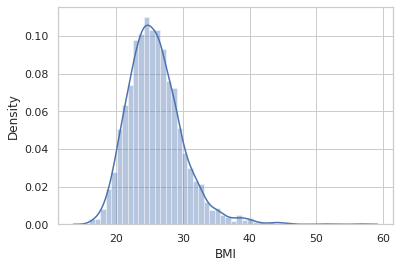

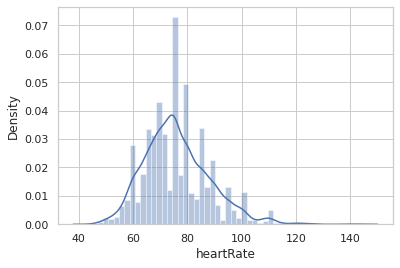

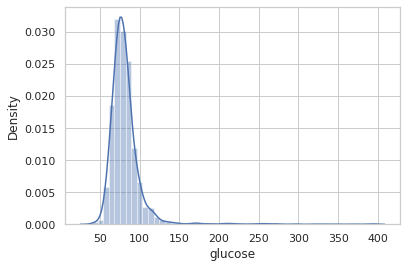

In [8]:
# Lets observe the distribution of features which have null values
null_feat = [f for f in data.columns if data[f].isnull().sum() != 0]
for i in null_feat:
  sns.distplot(data[i])
  plt.show()

In [9]:
# Printing skewness of features which have null values
for s in null_feat:
  print(f'The skewness of feature {s} is {data[s].skew()}')

The skewness of feature education is 0.6989458587600983
The skewness of feature cigsPerDay is 1.2230053709053774
The skewness of feature BPMeds is 5.524325007968017
The skewness of feature totChol is 0.9406357047700903
The skewness of feature BMI is 1.0222520011438563
The skewness of feature heartRate is 0.6764897223370003
The skewness of feature glucose is 6.1443896544049394


SO here, there are total of 7 features with null values.
Out of those, 


*   education, BPMeds are categorical features
*   cigsPerDay, totCHol, BMI, heartRate, glucose are numerical features.

All the above numerical features is skewed towards right side. Hence we can replace null values of those features with **median** values.

When it come to handle the null values for categorical features, we can replace the null values with most frequent values i.e, **mode** 



In [10]:
# Handling Null Values

# For Numerical Features
data['cigsPerDay'].fillna(data['cigsPerDay'].median(), inplace = True)
data['totChol'].fillna(data['totChol'].median(), inplace = True)
data['BMI'].fillna(data['BMI'].median(), inplace = True)
data['heartRate'].fillna(data['heartRate'].median(), inplace = True)
data['glucose'].fillna(data['glucose'].median(), inplace = True)

# For Categorical Features
data['education'].fillna(float(data['education'].mode()), inplace = True)
data['BPMeds'].fillna(float(data['BPMeds'].mode()), inplace = True)



In [11]:
# Checking null values after handling null values 
data.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

From now, we have no null values in the data.

In [12]:
# Removing id column because its not useful in further process
data.drop('id', axis = 1, inplace = True)

In [13]:
# Extracting numerical features
num_feat = [i for i in data.columns if data[i].dtype != 'O']
num_feat

['age',
 'education',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

In [14]:
# Extracting Categorical Features
cat_feat = [i for i in data.columns if data[i].dtype == 'O']
cat_feat

['sex', 'is_smoking']

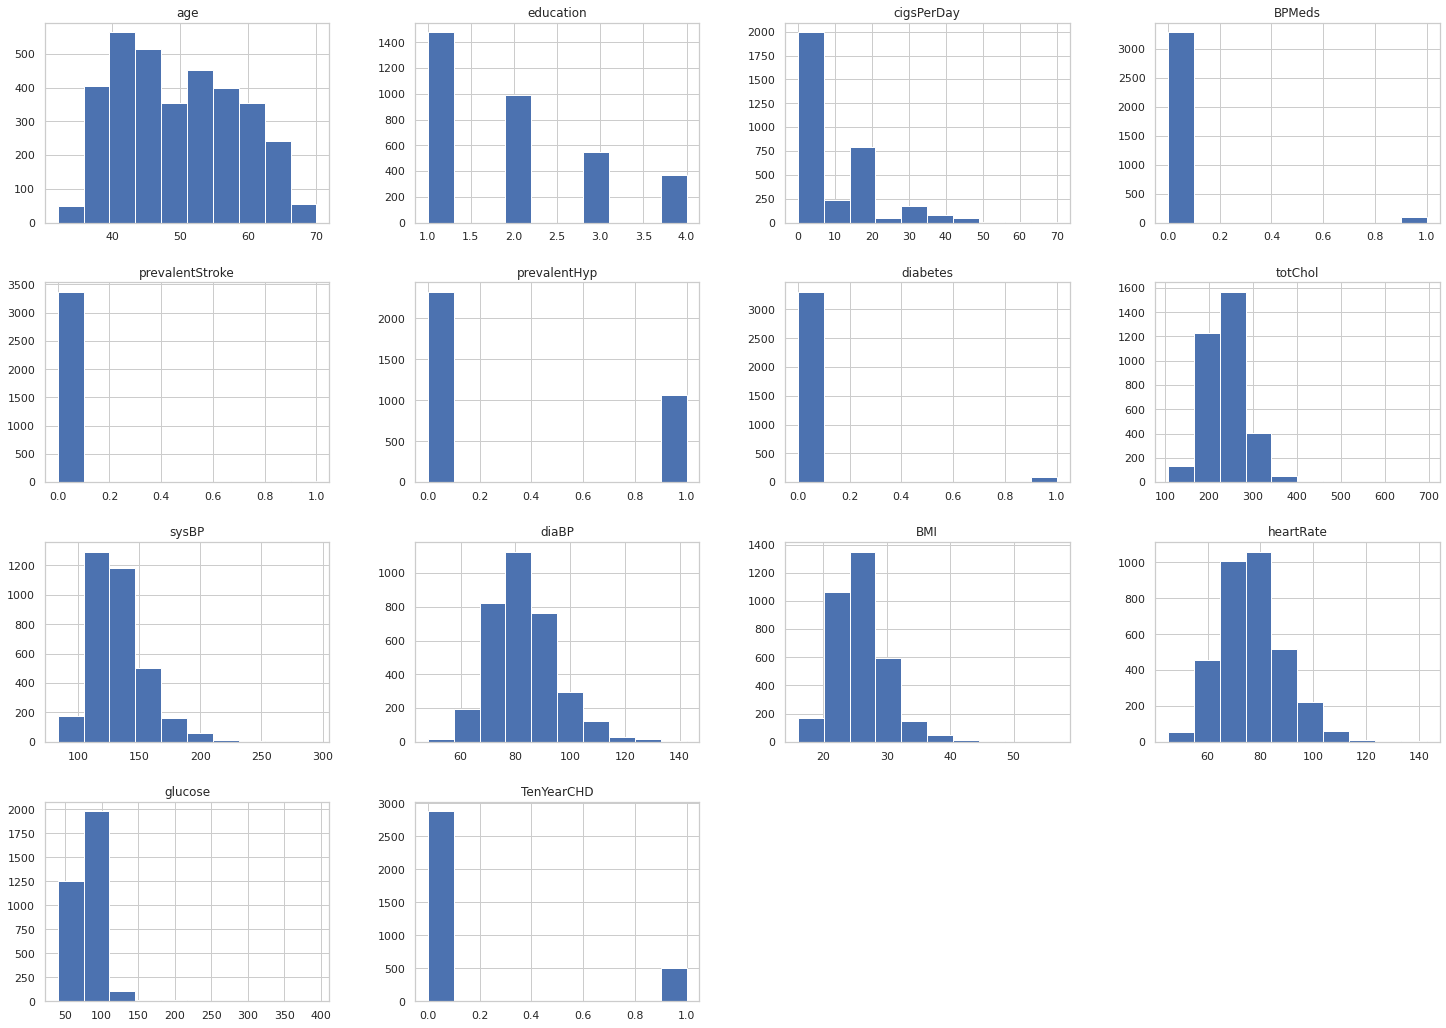

In [15]:
# lets observe the distribution of numerical features, for this we are using histograms. 
# A histogram is a form of a bar chart that groups numbers into ranges and the height of the bars show how many values fall into that range.

data.hist(figsize=(25,18))
plt.show()

From the above histograms, we can observe that


*   Our dependent feature, is actually an indicator variable with only two possible values; 0 and 1
*   Some featutres like prevalentStroke, prevalentHyp, diabetes, BPMeds, education and target features should be categorical features.



*   Most number of patient's age falls in the range 35 - 45

*   most number of patients belongs to education category '1.0'.

*   Most number of patients smoke cigerette in range of 0 - 10.

*   Most number of patients are not on BP Medications

*   Most number of patients does not have a stroke previously
*   Most number of patients are hot hypertensive.


*   Most number of patients are not diabetic.
*   Most number of patient's Cholestrol falls in the range 200 - 300



*   Most number of patient's Systolic Blood Pressure falls in the range 100 - 150


*   Most number of patient's Diastolic Blood Pressure falls in the range 70 - 90


*   Most number of patient's BMI falls in the range 20 - 30. And a very few has above 40


*   Most number of patient's Heart Rate falls in the range 70 - 90


*   Most number of patient's Glucose levels falls in the range 50 - 100.




















In numerical features, there are two types


1.   Continous feature
2.   Discrete feature

SO lets extract those features from numerical features.



In [16]:
# Extracting Continous Features from Numerical features
cont_feat = [i for i in num_feat if len(data[i].unique()) > 10]
cont_feat

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [17]:
# Extracting Discrete Features from Numerical features
discrete_feat = [i for i in num_feat if len(data[i].unique()) < 10]
discrete_feat

['education',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

We divided features into three types namely continous, discrete, categorical features. Lets observe the distributions of those features.

In [18]:
# Display the Continous features’ summary statistics
data[cont_feat].describe()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,3390.00000,3390.00000,3390.00000,3390.00000,3390.00000,3390.00000,3390.00000,3390.00000
mean,49.54218,9.01062,237.03982,132.60118,82.88304,25.79325,75.97699,81.72006
std,8.59288,11.86284,44.99421,22.29203,12.02358,4.10703,11.97011,23.16126
min,32.00000,0.00000,107.00000,83.50000,48.00000,15.96000,45.00000,40.00000
25%,42.00000,0.00000,206.00000,117.00000,74.50000,23.03000,68.00000,72.00000
50%,49.00000,0.00000,234.00000,128.50000,82.00000,25.38000,75.00000,78.00000
75%,56.00000,20.00000,264.00000,144.00000,90.00000,27.99750,83.00000,85.00000
max,70.00000,70.00000,696.00000,295.00000,142.50000,56.80000,143.00000,394.00000


From the above dataframe, we can observe that what are the count, mean, standard deviation, maximum values, minimum value, 25th percentile value, median or 50th percentile value, 75th percentile value of continous features.

In [19]:
# Display the Discrete features’ summary statistics
data[discrete_feat].astype(str).describe(include = 'object')

,education,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
count,3390,3390,3390,3390,3390,3390
unique,4,2,2,2,2,2
top,1.0,0.0,0,0,0,0
freq,1478,3290,3368,2321,3303,2879


From the above dataframe, we can observe that what are the count, unique values, most frequent value and its frequency of Discrete features.

In [20]:
# Display the Categorical features’ summary statistics
data.describe(include = 'object')

,sex,is_smoking
count,3390,3390
unique,2,2
top,F,NO
freq,1923,1703


From the above dataframe, we can observe that what are the count, unique values, most frequent value and its frequency of Categorical features.

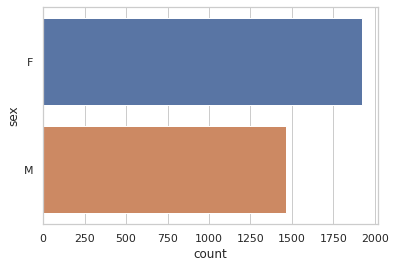

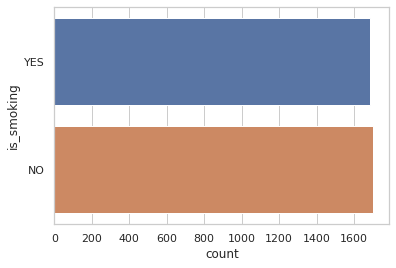

In [21]:
# Lets observe the distributions of categorical features
for c in cat_feat:
  sns.countplot(y = c, data = data)
  plt.show()

From the above visualizations, we can observe that


*   Most of the patients are females
*   Almost half of the patients have a habit of smoking



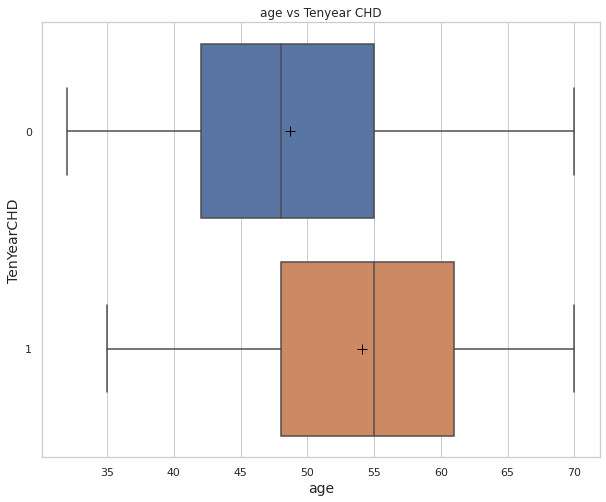

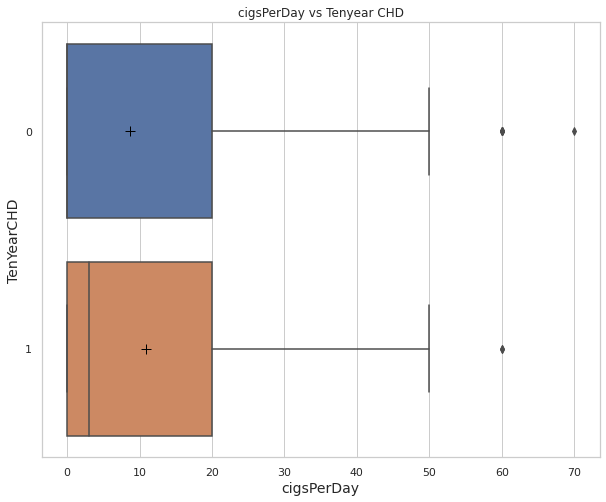

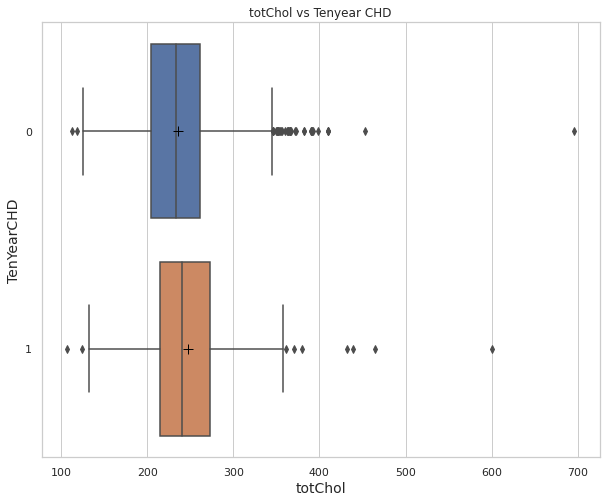

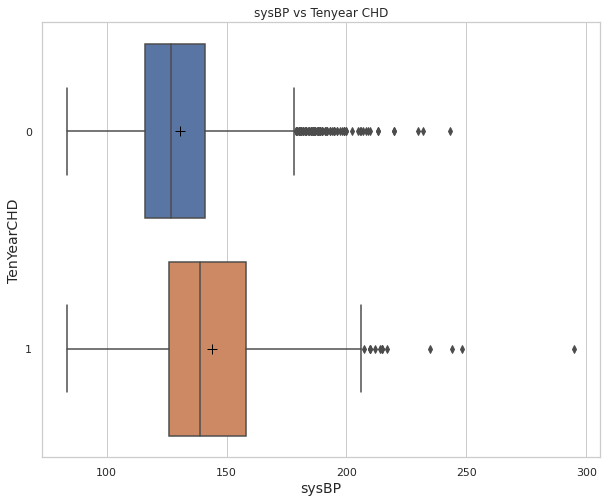

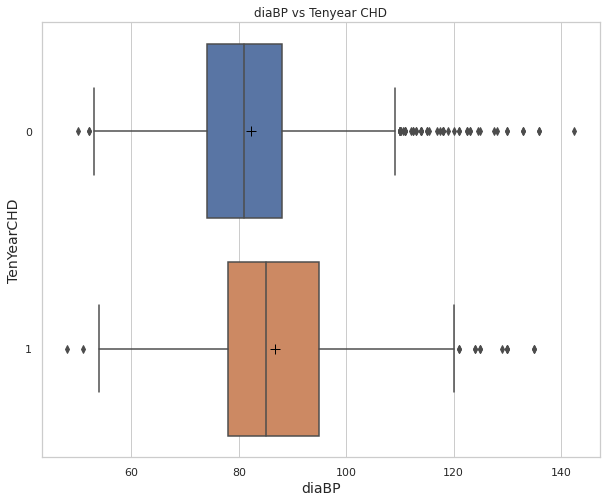

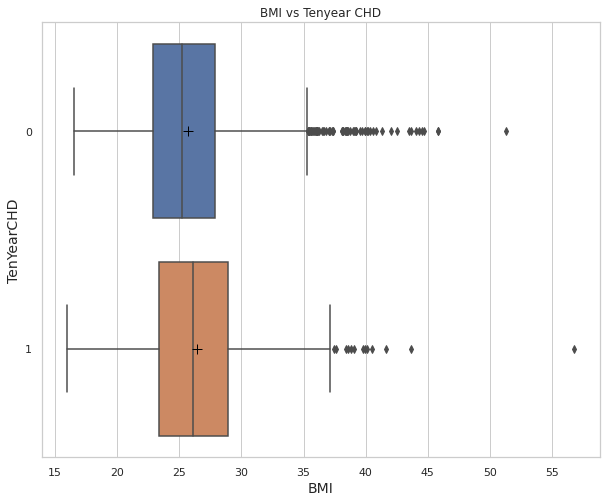

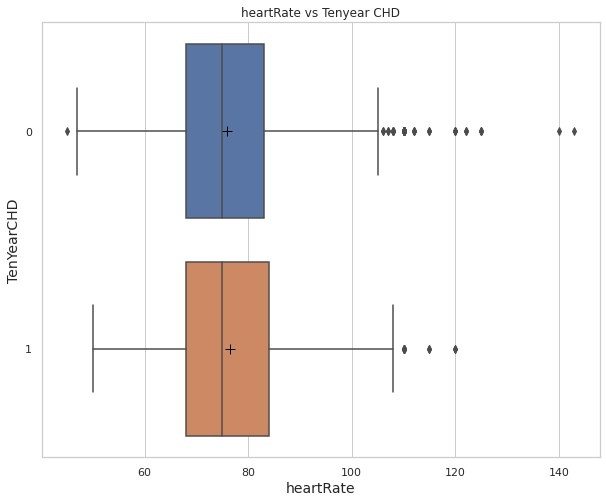

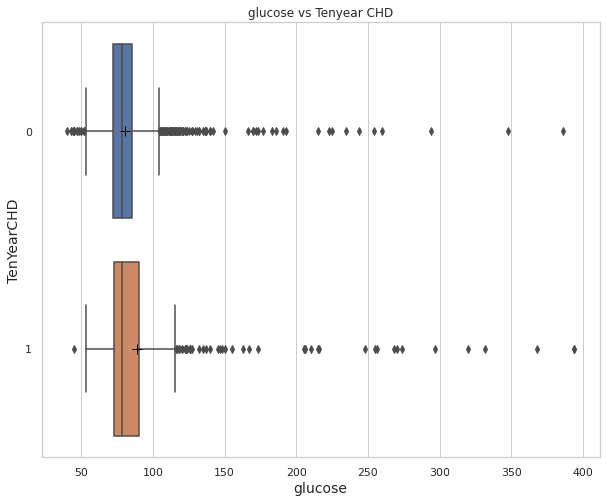

In [22]:
# Segment the target by numerical (continous) features
# Here, we will separate the data by the target feature and observe how the numerical (Continous) features are distributed 
for n in cont_feat:
  plt.figure(figsize=(10, 8))
  sns.boxplot(x=n,
            y = data['TenYearCHD'].astype('category'),
            data=data,
            showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
  plt.ylabel("TenYearCHD", size=14)
  plt.xlabel(n, size=14)
  plt.title(f'{n} vs Tenyear CHD', size=12)
  plt.show()

From the above boxplots, we can observe that


*   Outliers present in continous features except age column.


*   The feature 'cigsPerDay' is equally distributed, which means the feature is not a good predictor.





*   The patients who have more **age**, **totChol**, **sysBP**, **diaBP**, **BMI**,  **heartRate**, **glucose** are tending towards risk of coronary heart disease






In [23]:
# Segment Categorical features by the target classes.
# Now that we have seen how the target changes with numeric features, we will do the same for categorical features.

# For categorical features
for c in cat_feat:
  display(pd.crosstab(data['TenYearCHD'], data[c], normalize='index'))
  print('\t')



sex,F,M
TenYearCHD,,
0,0.58493,0.41507
1,0.46771,0.53229


is_smoking,NO,YES
TenYearCHD,,
0,0.50955,0.49045
1,0.46184,0.53816


From the above dataframes, we can say that



*   58.4 % of females and 41.5 % of males have no risk of CHD

*   46.7 % of females 53.22 % of males have risk of CHD

*   50.9 % of people who doesnt smoke have no risk of CHD

*   49 % of people who smoke have no risk of CHD

*   46.1 % of people who doesnt smoke have risk of CHD
*   53.8 % of people who smoke have risk of CHD




In [24]:
# For Discrete Features
for d in discrete_feat:
  display(pd.crosstab(data['TenYearCHD'], data[d], normalize='index'))
  print('\t')

education,1.00000,2.00000,3.00000,4.00000
TenYearCHD,,,,
0,0.41994,0.30288,0.16638,0.11080
1,0.52642,0.23092,0.13699,0.10568


BPMeds,0.00000,1.00000
TenYearCHD,,
0,0.97673,0.02327
1,0.93542,0.06458


prevalentStroke,0,1
TenYearCHD,,
0,0.99583,0.00417
1,0.98043,0.01957


prevalentHyp,0,1
TenYearCHD,,
0,0.71726,0.28274
1,0.50098,0.49902


diabetes,0,1
TenYearCHD,,
0,0.98124,0.01876
1,0.93542,0.06458


TenYearCHD,0,1
TenYearCHD,,
0,1.00000,0.00000
1,0.00000,1.00000


Lets Visualize the above dataframes

In [25]:
# Function which returns the multiple bar plots which helps to visualize the count of yes or no for heart risk (target variable) for each category of particular feature.
def comparison(feature):
  grouped_data = data.groupby([feature, 'TenYearCHD'])['age'].count().reset_index().rename(columns = {'age':'count'})


  yes = grouped_data[grouped_data['TenYearCHD'] == 1]
  no = grouped_data[grouped_data['TenYearCHD'] == 0]

  plt.figure(figsize = (8,6))
  width = 0.2  #assigning width

  # LOCATIONS TO PLOT
  yes_bar = np.arange(len(grouped_data[feature].unique()))
  no_bar = [i+width for i in yes_bar]



  plt.bar(yes_bar, yes['count'], width = width, label = 'YES' )
  plt.bar(no_bar, no['count'], width = width, label = 'NO' )


  plt.xticks(yes_bar+width + width/2 , yes[feature])
  plt.xlabel(feature)
  plt.ylabel('count')
  plt.title(f'Count of yes or no for heart risk for each category of {feature}')
  plt.legend()
  plt.show()





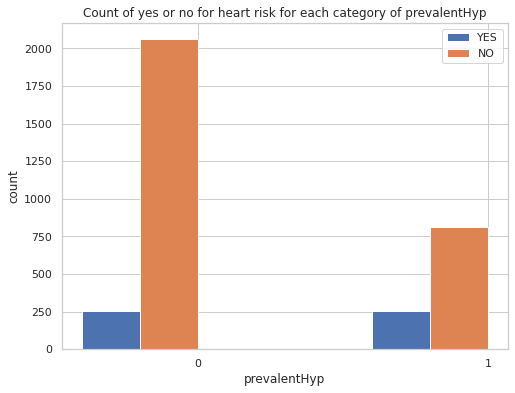

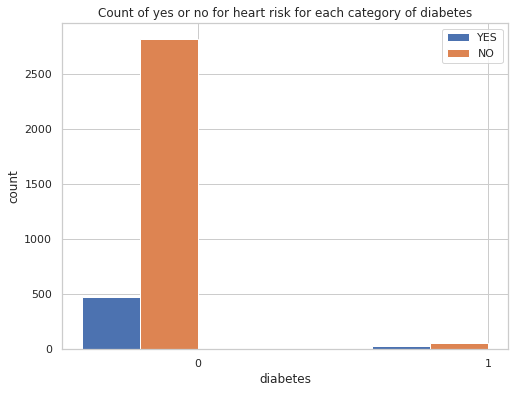

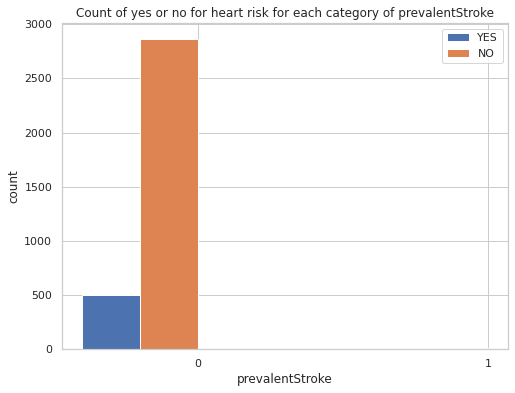

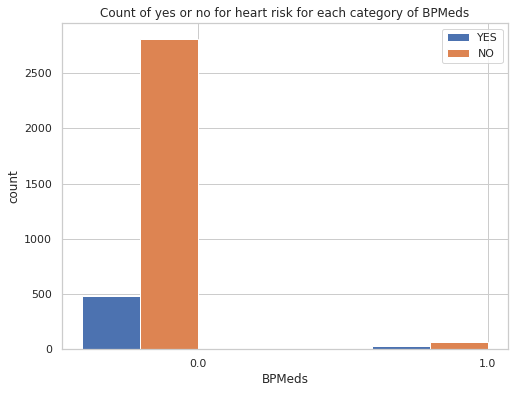

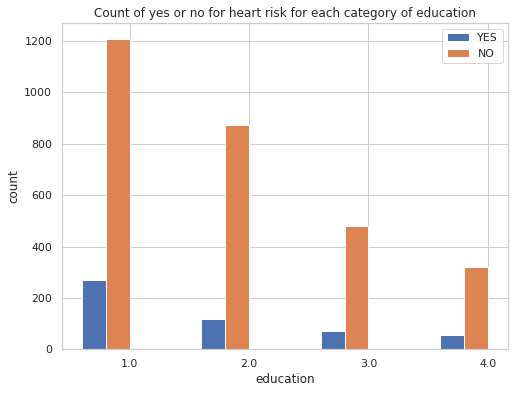

In [26]:
# Lets visualize the comparison of yes or no for heart risk (target feature) for each category of discrete features.
target = 'TenYearCHD'
feat = list(set(discrete_feat) - {target})  # Removing target feature
for f in feat:
  comparison(f)
  print('\t')

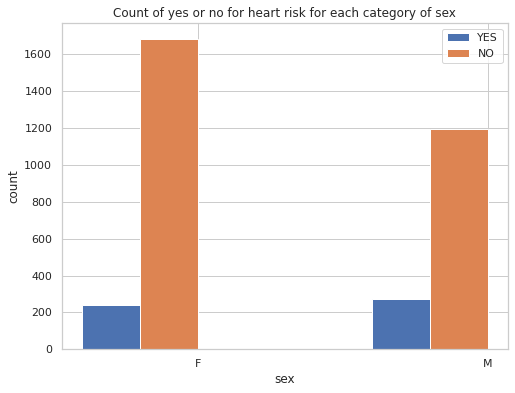

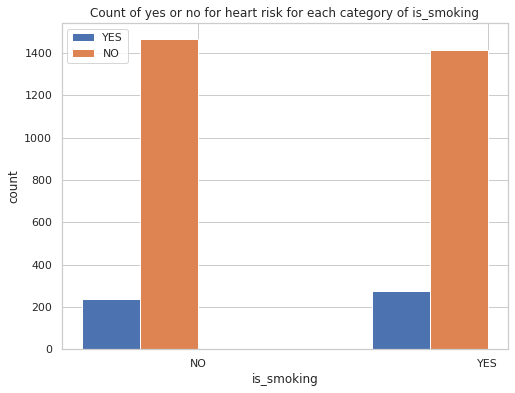

In [27]:
# Lets visualize the comparison of yes or no for heart risk (target feature) for each category of categorical features.
for c in cat_feat:
  comparison(c)

In [28]:
# Group numeric features by discrete and categorical features
# let us check how the categories are related to the numerical features

# For discrete features
for d in discrete_feat:
  display(data.groupby(d)[cont_feat].mean())
  print('\t')
  print('\t')

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
education,,,,,,,,
1.00000,51.86942,8.58051,238.27605,135.99391,83.85927,26.56026,76.00609,82.86468
2.00000,47.15455,9.98283,236.07172,131.10455,82.34798,25.27152,76.76970,80.93737
3.00000,48.56648,7.92896,236.54463,129.10929,81.51821,24.98310,75.84517,81.01639
4.00000,48.09383,9.72654,235.43968,128.26944,82.44370,25.33118,73.95174,80.29759


,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
BPMeds,,,,,,,,
0.00000,49.35927,9.08450,236.40517,131.58936,82.46641,25.73050,75.93921,81.47234
1.00000,55.56000,6.58000,257.92000,165.89000,96.59000,27.85770,77.22000,89.87000


,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
prevalentStroke,,,,,,,,
0,49.50119,9.05048,237.07898,132.49748,82.83714,25.78760,75.99555,81.67577
1,55.81818,2.90909,231.04545,148.47727,89.90909,26.65864,73.13636,88.50000


,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
prevalentHyp,,,,,,,,
0,47.74149,9.63852,232.19474,122.02348,77.88259,24.95827,74.75269,80.41620
1,53.45182,7.64733,247.55940,155.56735,93.73994,27.60616,78.63517,84.55098


,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
diabetes,,,,,,,,
0,49.39177,9.10324,236.60763,132.15259,82.76370,25.73474,75.89979,79.42840
1,55.25287,5.49425,253.44828,149.63218,87.41379,28.01460,78.90805,168.72414


,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,
0,48.72803,8.67072,235.26572,130.60386,82.19434,25.67884,75.87530,80.41785
1,54.12916,10.92564,247.03523,143.85421,86.76321,26.43787,76.54990,89.05675


In [29]:
# For categorical features

for c in cat_feat:
  display(data.groupby(c)[cont_feat].mean())
  print('\t')
  print('\t')


,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
sex,,,,,,,,
F,49.85647,5.59906,239.79199,133.32865,82.26521,25.48088,77.21789,81.78107
M,49.13020,13.48262,233.43217,131.64758,83.69291,26.20272,74.35037,81.64008


,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
is_smoking,,,,,,,,
NO,51.34645,0.00000,239.14445,135.83382,84.37052,26.49912,75.23664,83.08808
YES,47.72081,18.10670,234.91523,129.33788,81.38145,25.08069,76.72436,80.33906


Here, we get to compare various feature’s classes against the numerical features.

In [30]:
# lets convert categorical features into numerical features

# Function to convert sex column
def sex(x):
  if x == 'F':
    return 1
  else:
    return 0

# Function to convert is_smoking column
def is_smoking(x):
  if x == 'YES':
    return 1
  else:
    return 0

# applying above functions to categorical features
data['sex'] = data['sex'].apply(sex)
data['is_smoking'] = data['is_smoking'].apply(is_smoking)

In [31]:
# Inspecting head of data after converting
data.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.00000,1,1,3.00000,0.00000,0,0,0,221.00000,148.00000,85.00000,25.38000,90.00000,80.00000,1
1,36,4.00000,0,0,0.00000,0.00000,0,1,0,212.00000,168.00000,98.00000,29.77000,72.00000,75.00000,0
2,46,1.00000,1,1,10.00000,0.00000,0,0,0,250.00000,116.00000,71.00000,20.35000,88.00000,94.00000,0
3,50,1.00000,0,1,20.00000,0.00000,0,1,0,233.00000,158.00000,88.00000,28.26000,68.00000,94.00000,1
4,64,1.00000,1,1,30.00000,0.00000,0,0,0,241.00000,136.50000,85.00000,26.42000,70.00000,77.00000,0


In [32]:
# Lets observe correlation
data.corr()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
age,1.00000,-0.17061,0.04188,-0.21100,-0.19146,0.12211,0.05904,0.30883,0.10787,0.27196,0.40484,0.22190,0.13748,-0.00264,0.11239,0.22493
education,-0.17061,1.00000,-0.02528,0.03019,0.01408,-0.01988,-0.03182,-0.08192,-0.05190,-0.02122,-0.13220,-0.06077,-0.13578,-0.03940,-0.03930,-0.05139
sex,0.04188,-0.02528,1.00000,-0.21549,-0.32931,0.04319,0.01127,-0.00307,-0.00885,0.07004,0.03737,-0.05884,-0.08709,0.11871,0.00302,-0.08465
is_smoking,-0.21100,0.03019,-0.21549,1.00000,0.76327,-0.03753,-0.04370,-0.11932,-0.05333,-0.04700,-0.14572,-0.12432,-0.17271,0.06215,-0.05935,0.03414
cigsPerDay,-0.19146,0.01408,-0.32931,0.76327,1.00000,-0.03573,-0.04158,-0.07800,-0.04811,-0.02535,-0.10035,-0.06832,-0.09983,0.06623,-0.06637,0.06802
BPMeds,0.12211,-0.01988,0.04319,-0.03753,-0.03573,1.00000,0.11618,0.25689,0.07093,0.08092,0.26038,0.19878,0.08765,0.01811,0.06136,0.08735
prevalentStroke,0.05904,-0.03182,0.01127,-0.04370,-0.04158,0.11618,1.00000,0.07165,0.01012,-0.01077,0.05757,0.04724,0.01703,-0.01918,0.02366,0.06863
prevalentHyp,0.30883,-0.08192,-0.00307,-0.11932,-0.07800,0.25689,0.07165,1.00000,0.08257,0.15869,0.69929,0.61290,0.29961,0.15073,0.08296,0.16654
diabetes,0.10787,-0.05190,-0.00885,-0.05333,-0.04811,0.07093,0.01012,0.08257,1.00000,0.05919,0.12401,0.06117,0.08779,0.03975,0.60974,0.10368
totChol,0.27196,-0.02122,0.07004,-0.04700,-0.02535,0.08092,-0.01077,0.15869,0.05919,1.00000,0.19785,0.15382,0.11345,0.08696,0.06091,0.09360


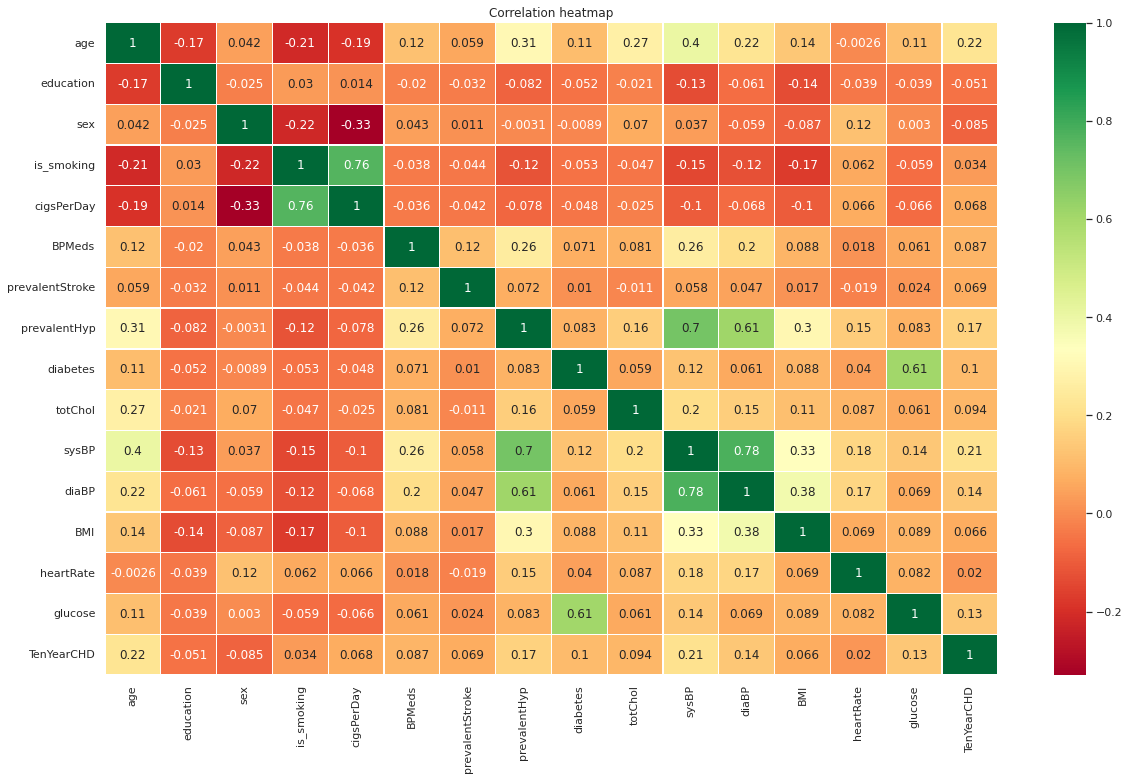

In [33]:
# Visualize the correlation heatmap of numerical features
plt.figure(figsize = (20,12))
sns.heatmap(data.corr(),  fmt=".2g",cmap='RdYlGn',linewidths=0.30,  annot = True)
plt.title('Correlation heatmap')
plt.show()

Hence, from the above correlation heatmap we can observe that there are features exist with multicollinearity. They are


*   is_smoking and cigsPerDay are 76% correlated with each other 

*   prevalent_hyp and sysBP are 70% correlated with each other 
*   sys_BP and diaBP are 78% correlated with each other 


*   prevalent_hyp and diaBP are 61% correlated with each other 

*   glucose and diabetes are 61% correlated with each other 

In [34]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
  

In [35]:
# Calculating variance inflation factor
X = data.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,age,41.00621
1,education,4.57505
2,sex,2.75118
3,is_smoking,4.84399
4,cigsPerDay,4.10468
5,BPMeds,1.13290
6,prevalentStroke,1.02704
7,prevalentHyp,2.42968
8,diabetes,1.58544
9,totChol,30.94741





*   Systolic blood pressure, measures the pressure in your arteries when your heart beats.
*   Diastolic blood pressure, measures the pressure in your arteries when your heart rests between beats.


*   The top number (systolic) minus the bottom number (diastolic) is the pulse pressure.

So we can create new feature 'pulse_pressure' from sysBP and diaBP






In [36]:
 # Removing Outliers
# Creating a for loop for storing the indeces of outliers
for i in cont_feat:
  indeces = []                                              # creating a empty list
  x = data[i]
  mean = data[i].mean()
  std = data[i].std()
  index = data[(np.abs(x)) - (mean) >= (3 * std)].index     # getting the index of outlier
  indeces.append(index)                                     # appending outlier indeces into indeces list


In [37]:
# Displaying the list of indeces of outliers
outliers_index = list(indeces)[0]
outliers_index

Int64Index([  77,  107,  134,  151,  173,  230,  312,  400,  481,  534,  594,
             786, 1032, 1150, 1156, 1281, 1559, 1587, 1610, 1819, 1947, 1977,
            1993, 2164, 2187, 2188, 2262, 2566, 2672, 2703, 2755, 2785, 3042,
            3045, 3063, 3069, 3092, 3117, 3164, 3232, 3260, 3373],
           dtype='int64')

The above list contains list of indexes of outliers.

In [38]:
# Creating a copy of data in which we will remove outliers
df = data.copy()

# Removing outliers
df.drop(outliers_index, inplace = True)

In [39]:
# Creating new feature pulse_pressure
df['pulse_pressure'] = df['sysBP'] - df['diaBP']

In [40]:
# Dropping sysBP, diaBP, prevalentHyp, is_smoking to remove multi-collinearity
df.drop(['sysBP', 'diaBP', 'prevalentHyp', 'is_smoking'], axis = 1, inplace = True)

In [41]:
df.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,pulse_pressure
0,64,2.00000,1,3.00000,0.00000,0,0,221.00000,25.38000,90.00000,80.00000,1,63.00000
1,36,4.00000,0,0.00000,0.00000,0,0,212.00000,29.77000,72.00000,75.00000,0,70.00000
2,46,1.00000,1,10.00000,0.00000,0,0,250.00000,20.35000,88.00000,94.00000,0,45.00000
3,50,1.00000,0,20.00000,0.00000,0,0,233.00000,28.26000,68.00000,94.00000,1,70.00000
4,64,1.00000,1,30.00000,0.00000,0,0,241.00000,26.42000,70.00000,77.00000,0,51.50000


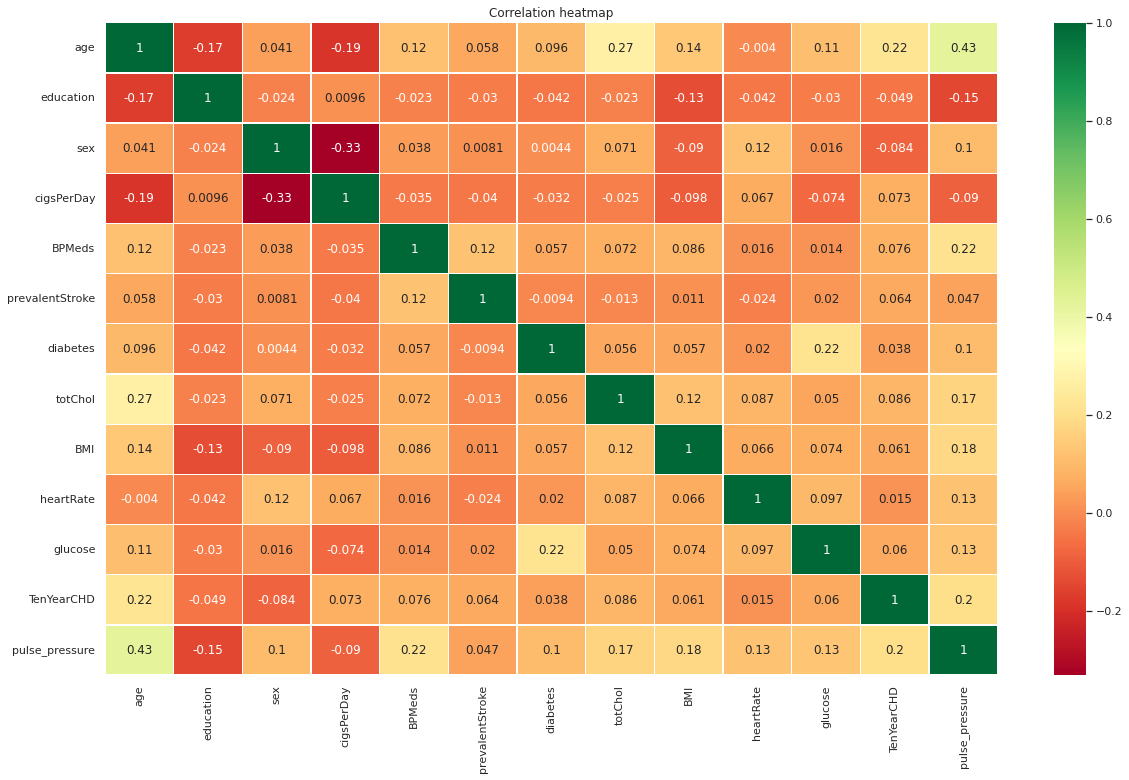

In [42]:
# Visualize the correlation heatmap of numerical features
plt.figure(figsize = (20,12))
sns.heatmap(df.corr(),  fmt=".2g",cmap='RdYlGn',linewidths=0.30,  annot = True)
plt.title('Correlation heatmap')
plt.show()

From now there is no multicollinearity exists in the data.

For the classification task, some models needs scaled data. some doesnt need scaled data. So we can create two copies of data

In [43]:
# Creating a copies of data
df_scaled = df.copy()
df_notscaled = df.copy()

In [44]:
# Importing necessary libraries from sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [45]:
# Storing input values into 'X' and target values into 'y'
X = df_scaled.drop('TenYearCHD', axis = 1)
y = df_scaled['TenYearCHD']

# Scaling the input features
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X)

In [46]:
# Splitting the data into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, stratify = y)

**Handling class Imbalance**

In [47]:
# Lets observe the classes of target feature
df_scaled['TenYearCHD'].value_counts()

0    2859
1     489
Name: TenYearCHD, dtype: int64

Here, we can see the count of '0' class is high.

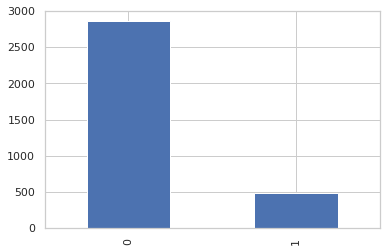

In [48]:
# Plotting the value counts
df_scaled['TenYearCHD'].value_counts().plot.bar()
plt.show()

In [49]:
# Resampling the Train dataset using SMOTETEK inorder to handle class imbalance
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state = 42)
X_train, y_train = smk.fit_resample(X_train, y_train)

In [50]:
# Lets observe the shape after oversampling
print(f'The shape and X is {X_train.shape} and Y is {y_train.shape}')

The shape and X is (4548, 12) and Y is (4548,)


In [51]:
# Lets observe the shape after oversampling
print(f'The shape and X is {X_test.shape} and Y is {y_test.shape}')

The shape and X is (670, 12) and Y is (670,)


## **Fitting the data into models**

**Creating model pipeline**

In [52]:
#machine learning model_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model_pipeline = []
model_pipeline.append(LogisticRegression(solver='liblinear'))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(GaussianNB ())

**Evaluation Metrics For Train Data**

In [53]:
# Calculating evaluation metrics for train data
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
model_list = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes']
acc_list_tr = []
pres_list_tr = []
recall_tr = []
f1_tr = []
auc_list_tr= []
cm_list_tr = []
for model in model_pipeline :
  model.fit (X_train, y_train)
  y_pred_tr = model.predict(X_train)
  acc_list_tr.append (metrics.accuracy_score(y_train, y_pred_tr) )
  pres_list_tr.append(precision_score(y_train, y_pred_tr))
  recall_tr.append(recall_score(y_train, y_pred_tr))
  f1_tr.append(f1_score(y_train, y_pred_tr))
  fpr_tr, tpr_tr, _thresholds_tr = metrics.roc_curve(y_train, y_pred_tr)
  auc_list_tr.append(round(metrics.auc(fpr_tr, tpr_tr),2))
  cm_list_tr.append(confusion_matrix(y_train, y_pred_tr))

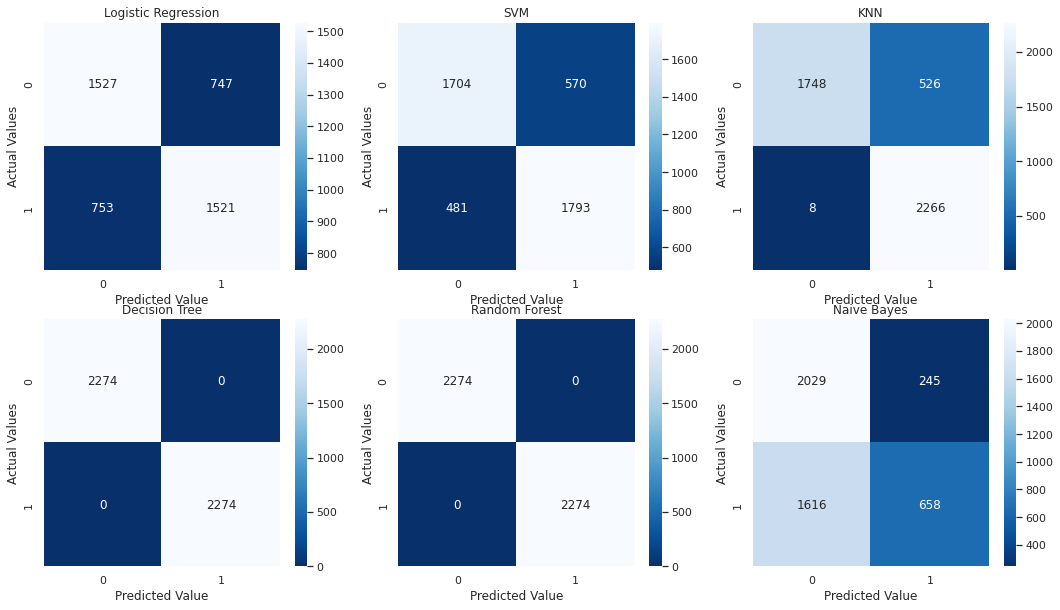

In [54]:
# Plotting confusion matrix for train data
fig = plt.figure(figsize = (18,10))
for i in range(len(cm_list_tr)):
  cm_tr = cm_list_tr[i]
  model = model_list[i]
  sub = fig.add_subplot(2, 3, i+1).set_title(model)
  cm_plot_tr = sns.heatmap(cm_tr, annot = True, cmap = 'Blues_r',fmt='g')
  cm_plot_tr.set_xlabel("Predicted Value")
  cm_plot_tr.set_ylabel('Actual Values')
  
  

In [93]:
# printing evaluation metrics for train data
result_df_tr = pd.DataFrame({'Model': model_list, 'Accuracy': acc_list_tr, "AUC": auc_list_tr, 'Precision':pres_list_tr, 'Recall':recall_tr, 'F1 Score': f1_tr})
print('Evaluation Metrics For Train Data')
result_df_tr

Evaluation Metrics For Train Data


,Model,Accuracy,AUC,Precision,Recall,F1 Score
0,Logistic Regression,0.67018,0.67000,0.67063,0.66887,0.66975
1,SVM,0.76891,0.77000,0.75878,0.78848,0.77334
2,KNN,0.88259,0.88000,0.81160,0.99648,0.89459
3,Decision Tree,1.00000,1.00000,1.00000,1.00000,1.00000
4,Random Forest,1.00000,1.00000,1.00000,1.00000,1.00000
5,Naive Bayes,0.59081,0.59000,0.72868,0.28936,0.41423


From the above visualizations and dataframe, we can say thet Decision Tree and Random Forest model are overfitted.

**Evaluation Metrics for Test Data**

In [56]:
# Calculating evaluation metrics for test data
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
model_list = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes']
acc_list = []
pres_list = []
f1 = []
recall = []
auc_list= []
cm_list = []
for model in model_pipeline :
  model.fit (X_train, y_train)
  y_pred = model.predict(X_test)
  acc_list.append (metrics.accuracy_score(y_test, y_pred) )
  pres_list.append(precision_score(y_test, y_pred))
  recall.append(recall_score(y_test, y_pred))
  f1.append(f1_score(y_test, y_pred))
  fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
  auc_list.append(round(metrics.auc(fpr, tpr),2))
  cm_list.append(confusion_matrix(y_test, y_pred))

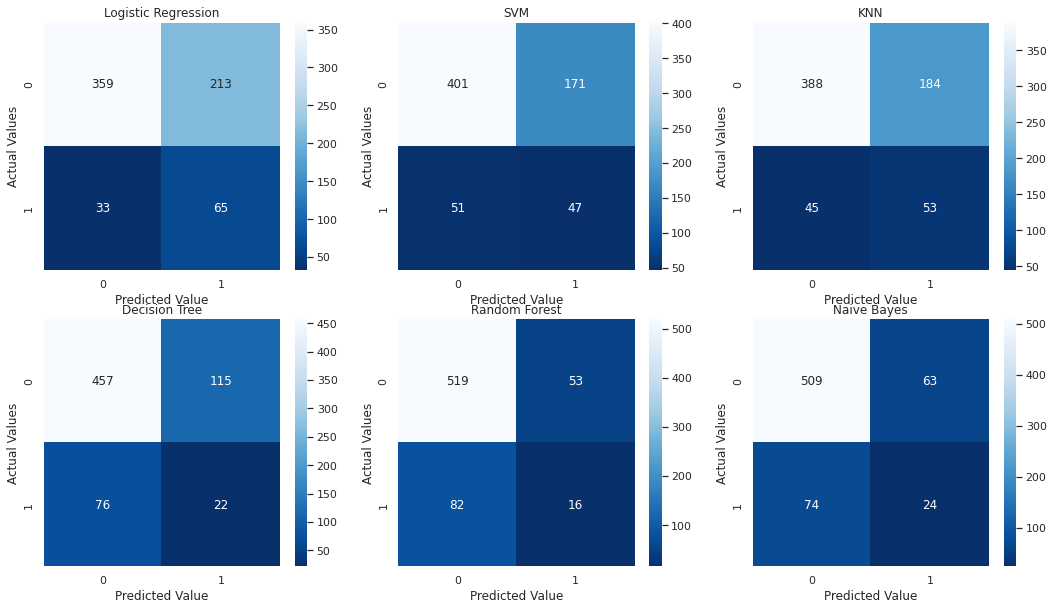

In [57]:
# Plotting evaluation metrics for test data
fig = plt.figure(figsize = (18,10))
for i in range(len(cm_list)):
  cm = cm_list[i]
  model = model_list[i]
  sub = fig.add_subplot(2, 3, i+1).set_title(model)
  cm_plot = sns.heatmap(cm, annot = True, cmap = 'Blues_r',fmt='g')
  cm_plot.set_xlabel("Predicted Value")
  cm_plot.set_ylabel('Actual Values')

In [58]:
# Printing evaluation metrics for test data
result_df = pd.DataFrame({'Model': model_list, 'Accuracy': acc_list, "AUC": auc_list, 'Precision':pres_list, 'Recall':recall, 'F1 Score': f1})
print('Evaluation Metrics for test data')
result_df

Evaluation Metrics for test data


,Model,Accuracy,AUC,Precision,Recall,F1 Score
0,Logistic Regression,0.63284,0.65000,0.23381,0.66327,0.34574
1,SVM,0.66866,0.59000,0.21560,0.47959,0.29747
2,KNN,0.65821,0.61000,0.22363,0.54082,0.31642
3,Decision Tree,0.71493,0.51000,0.16058,0.22449,0.18723
4,Random Forest,0.79851,0.54000,0.23188,0.16327,0.19162
5,Naive Bayes,0.79552,0.57000,0.27586,0.24490,0.25946



For classification task, there are various metrics used for evaluation. 

For our problem statement, we have two cases

**Case 1 :** if a person has a disease but the model shows the person has no 
risk. For this case **recall** is the best evaluation metric

**Case 2 :** if a person has no risk of disease but the models predicts the person has a risk. For this case, **precision** is the best evaluation metric

When both of the above cases are important, we can use **F1_score** evaluation metric

From the above metrics Dataframe, we can say that

*   If **Recall** is important, i.e., if we want to focus on case 1, then **Logistic Regression** and **KNN** models are preferrable

*   If **Precision** is important i.e., if we want to focus on case 2, then **Naive Bayes** model is preferrable

*   If **F_Score** is important, i.e., if we want to focus on both case 1 and case 2, then **Logistic Regression** model is preferrable

## **Fitting the data into each model by tuning hyperparameters**

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

# Creating a function that takes model as input and prints the dataframe of metrics
def score(model):
  acc = accuracy_score(y_test, model.predict(X_test))
  prec = precision_score(y_test, model.predict(X_test))
  recall = recall_score(y_test, model.predict(X_test))
  f1 = f1_score(y_test, model.predict(X_test))

  df = pd.DataFrame({'Metric':['Accuracy', 'Precision', 'Recall', 'F1 Score'], 'score':[acc, prec, recall, f1]})
  plt.show()

  display(df)

# Creating a function that takes model as input and prints the classification report of the model
def report(model):
    report = pd.DataFrame(classification_report(y_test, model.predict(X_test), output_dict=True))
    display(report)

# Creating a function that takes model as input and prints confusion matrix of test data
def conf_matrix(model):
  cm = confusion_matrix(y_test, model.predict(X_test))
  sns.heatmap(cm, annot = True, cmap = 'Blues_r',fmt='g')
  plt.show


**Logistic Regression**

In [94]:
# Fitting the training data into logistic regression model by tuning hyperparameters
log = LogisticRegression()
from sklearn.model_selection import GridSearchCV
parameters = {'penalty': ['l1','l2', 'elasticnet'],
              'C':[1,2,3,4,5,6,8,10,20,30,40,50],
              'max_iter':[100,200,300,400,500]
              }

best_log = GridSearchCV(log, parameters, scoring = 'f1', cv = 5)
best_log.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 8, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300, 400, 500],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='f1')

In [95]:
# best score
best_log.best_score_

0.667527175175527

In [96]:
# best parameters
best_log.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}

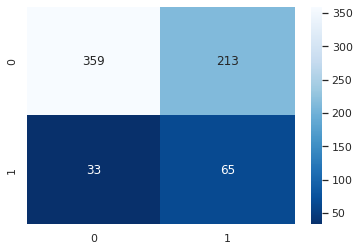

In [97]:
# Confusion matrix of test data 
conf_matrix(best_log)

In [98]:
# Evaluation metrics of test data
score(best_log)

,Metric,score
0,Accuracy,0.63284
1,Precision,0.23381
2,Recall,0.66327
3,F1 Score,0.34574


In [65]:
# Classification report
report(best_log)

,0,1,accuracy,macro avg,weighted avg
precision,0.91582,0.23381,0.63284,0.57481,0.81606
recall,0.62762,0.66327,0.63284,0.64544,0.63284
f1-score,0.74481,0.34574,0.63284,0.54528,0.68644
support,572.00000,98.00000,0.63284,670.00000,670.00000


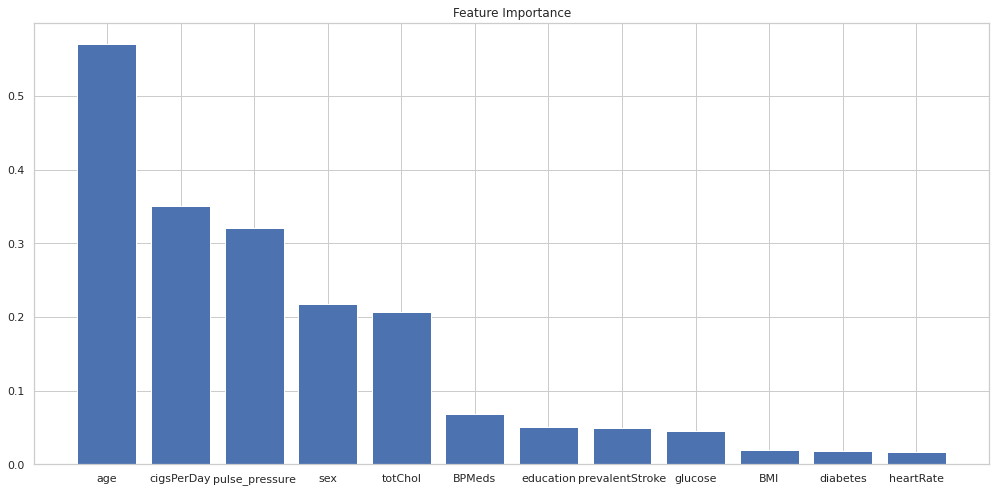

In [66]:
# Plotting Feature importance for logistic regression model
log_model = log.fit(X_train, y_train)
importance = np.abs(log_model.coef_[0])
feature = df_scaled.drop('TenYearCHD', axis = 1).columns
indices = np.argsort(importance)
indices = indices[::-1]
plt.figure(figsize=(14,7))
plt.bar(range(len(indices)),importance[indices])
plt.xticks(range(len(indices)), [feature[i] for i in indices])
plt.title('Feature Importance')
plt.tight_layout()

For logistic regression, 'age' feature has more importance and least is 'BMI', 'diabetes', 'heartRate'.




**Support Vector Classification**

In [67]:
# Checking which kernel gives best F1_score
ker = ['linear', 'rbf', 'poly']
for i in ker:
  model = SVC(kernel = i)
  model.fit(X_train, y_train)
  print(f'for kernal = {i}, f1_score is {f1_score(y_test, model.predict(X_test))}')

for kernal = linear, f1_score is 0.34986945169712796
for kernal = rbf, f1_score is 0.2974683544303798
for kernal = poly, f1_score is 0.2866242038216561


For the kernel = linear, the model gives best score

In [68]:
# Checking what C value gives best F1 Score
c = [0.01, 0.1,1, 10, 100,1000]
for i in c:
  mc = SVC(kernel = 'linear', C = i)
  cl = mc.fit(X_train, y_train)
  print(f'for c = {i}, f1_score = {f1_score(y_test, cl.predict(X_test))}')

for c = 0.01, f1_score = 0.3526315789473684
for c = 0.1, f1_score = 0.34986945169712796
for c = 1, f1_score = 0.34986945169712796
for c = 10, f1_score = 0.34986945169712796
for c = 100, f1_score = 0.34986945169712796
for c = 1000, f1_score = 0.3517060367454068


For C = 1, the model gives best score

In [69]:
# Fitting the data into model
svc_model = SVC(kernel = 'linear', C = 1)
svc_model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

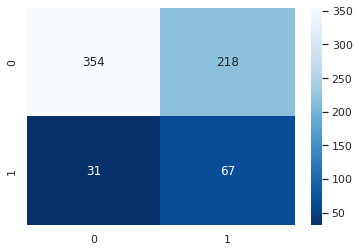

In [70]:
# Confusion matrix of test data
conf_matrix(svc_model)

In [71]:
# Evaluation metrics of test data
score(svc_model)

,Metric,score
0,Accuracy,0.62836
1,Precision,0.23509
2,Recall,0.68367
3,F1 Score,0.34987


In [72]:
# Classification Report
report(svc_model)

,0,1,accuracy,macro avg,weighted avg
precision,0.91948,0.23509,0.62836,0.57728,0.81938
recall,0.61888,0.68367,0.62836,0.65128,0.62836
f1-score,0.73981,0.34987,0.62836,0.54484,0.68278
support,572.00000,98.00000,0.62836,670.00000,670.00000


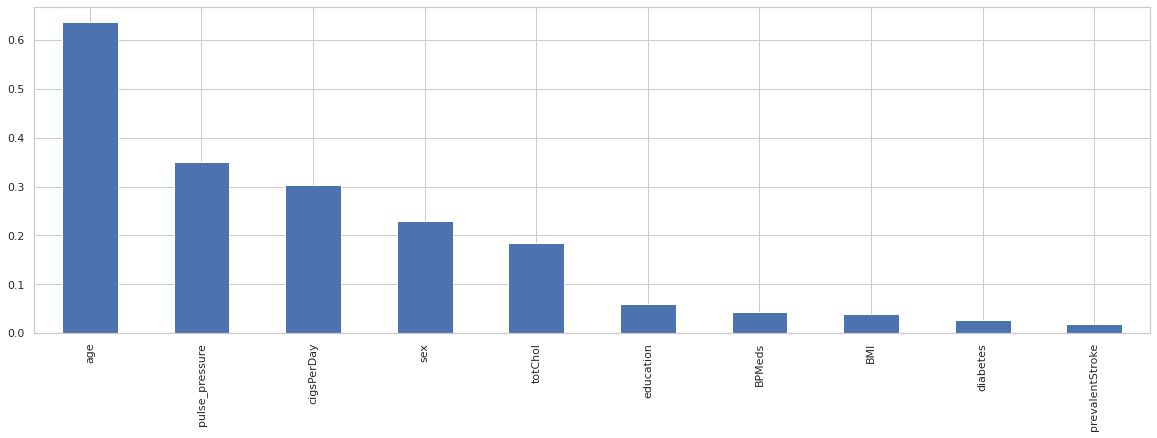

In [114]:
# Feature importance for SVM Classifier
plt.figure(figsize = (20, 6))
pd.Series(abs(svc_model.coef_[0]), index=df_scaled.drop('TenYearCHD', axis = 1).columns).nlargest(10).plot(kind='bar')
plt.show()

For SVM Classifier, 'age' feature has more importance and least is 'prevalentStroke'.

**KNN Classification**

In [74]:
# Fitting the training data into KNN Classifier model by tuning hyperparameters
knn = KNeighborsClassifier()
param_grid = {'n_neighbors':np.arange(1,50)}
knn_cv= GridSearchCV(knn,param_grid, scoring = 'f1',cv=5)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             scoring='f1')

In [75]:
# best parameters
knn_cv.best_params_

{'n_neighbors': 2}

In [76]:
# best score
knn_cv.best_score_

0.9074004621408985

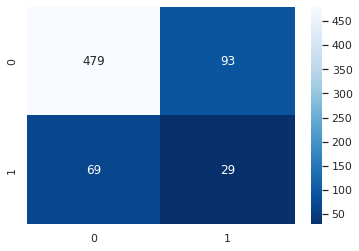

In [77]:
# confusion matrix
conf_matrix(knn_cv)

In [78]:
# Evaluation Metrics
score(knn_cv)

,Metric,score
0,Accuracy,0.75821
1,Precision,0.23770
2,Recall,0.29592
3,F1 Score,0.26364


In [99]:
# CLassification Report
report(knn_cv)

,0,1,accuracy,macro avg,weighted avg
precision,0.87409,0.23770,0.75821,0.55590,0.78100
recall,0.83741,0.29592,0.75821,0.56667,0.75821
f1-score,0.85536,0.26364,0.75821,0.55950,0.76881
support,572.00000,98.00000,0.75821,670.00000,670.00000


**Decision Tree Classification**

In [79]:
# Fitting the training data into Decision Tree Classifier model by tuning hyperparameters
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
parameters = {
    'criterion':['gini', 'entropy'],
    'max_depth': range(1, 10),
    'min_samples_split': range(1, 10),
    'min_samples_leaf': range(1, 5)
}
dtc_hyp = GridSearchCV(dt_clf, parameters, scoring = 'f1', cv = 5)
dtc_hyp.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             scoring='f1')

In [80]:
# Best parameters
dtc_hyp.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 6}

In [81]:
# best score
dtc_hyp.best_score_

0.7553711307614404

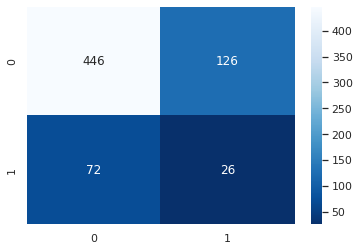

In [82]:
# Confusion matrix
conf_matrix(dtc_hyp)

In [83]:
# Evaluation metrics 
score(dtc_hyp)

,Metric,score
0,Accuracy,0.70448
1,Precision,0.17105
2,Recall,0.26531
3,F1 Score,0.20800


In [84]:
# classification report
report(dtc_hyp)

,0,1,accuracy,macro avg,weighted avg
precision,0.86100,0.17105,0.70448,0.51603,0.76009
recall,0.77972,0.26531,0.70448,0.52251,0.70448
f1-score,0.81835,0.20800,0.70448,0.51317,0.72907
support,572.00000,98.00000,0.70448,670.00000,670.00000


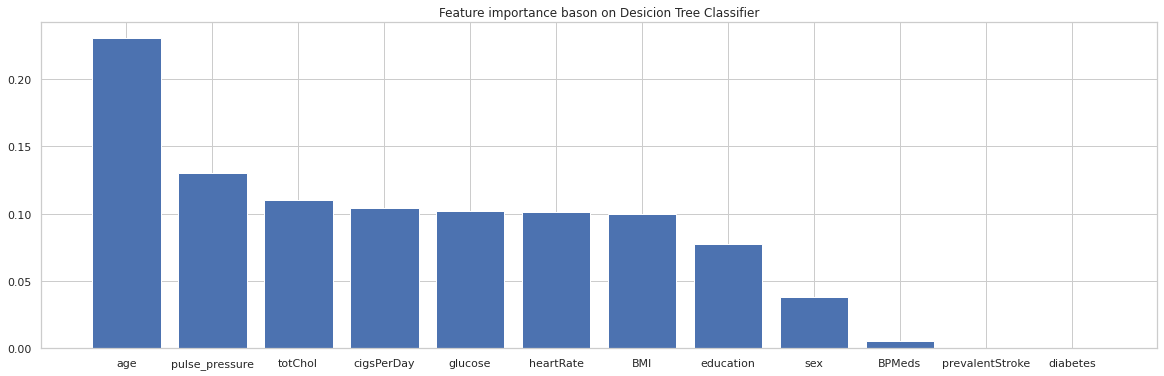

In [105]:
# Plotting feature importance for Desicion Tree Regressor
plt.figure(figsize = (20, 6))
feat_imp_ds = pd.DataFrame({'feature':df_scaled.drop('TenYearCHD', axis = 1).columns, 'importance':dt_clf.fit(X_train, y_train).feature_importances_}).sort_values(by = 'importance' , ascending = False)
plt.bar(feat_imp_ds['feature'], feat_imp_ds['importance'])
plt.title('Feature importance bason on Desicion Tree Classifier')
plt.show()

For Decision Tree Classifier , 'age' feature has more importance and least is 'prevalentStroke', 'diabetes'.

**Random Forest Classifier**

In [86]:
# Fitting the training data into Random Forest Classifier model by tuning hyperparameters
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
parameters = {
    'max_depth':[2, 8, 16],
    'n_estimators' : [64, 128, 256]
}
rf_hyp = GridSearchCV(rf_clf, parameters, scoring = 'f1', cv = 5)
rf_hyp.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 8, 16],
                         'n_estimators': [64, 128, 256]},
             scoring='f1')

In [87]:
# best parameters
rf_hyp.best_params_

{'max_depth': 16, 'n_estimators': 256}

In [88]:
# best score
rf_hyp.best_score_

0.9023557629621493

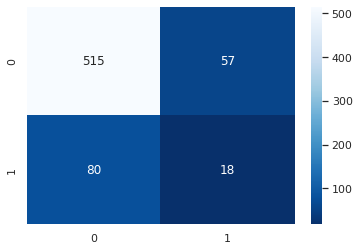

In [89]:
# Confusion matrix
conf_matrix(rf_hyp)

In [90]:
# EValuation Metrics 
score(rf_hyp)

,Metric,score
0,Accuracy,0.79552
1,Precision,0.24000
2,Recall,0.18367
3,F1 Score,0.20809


In [91]:
# Classification report
report(rf_hyp)

,0,1,accuracy,macro avg,weighted avg
precision,0.86555,0.24000,0.79552,0.55277,0.77405
recall,0.90035,0.18367,0.79552,0.54201,0.79552
f1-score,0.88260,0.20809,0.79552,0.54535,0.78394
support,572.00000,98.00000,0.79552,670.00000,670.00000


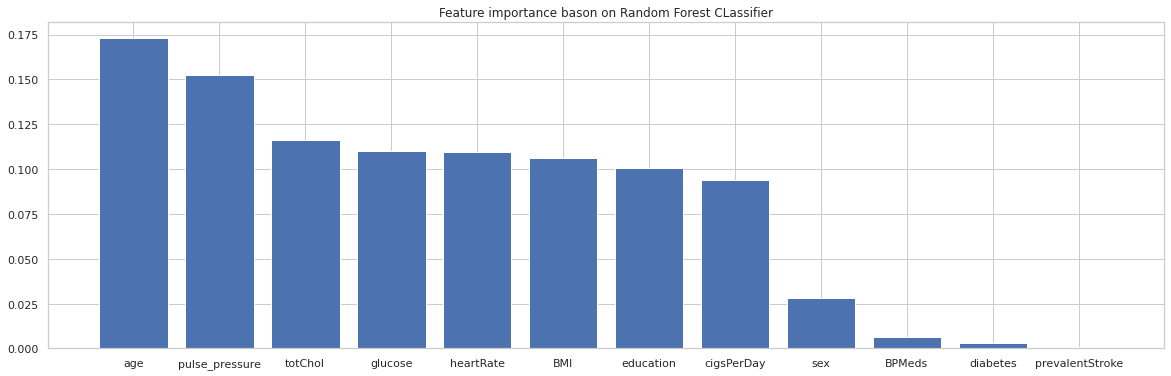

In [107]:
# Plotting feature importance for Random Forest Classifier
plt.figure(figsize = (20, 6))
feat_imp_ds = pd.DataFrame({'feature':df_scaled.drop('TenYearCHD', axis = 1).columns, 'importance':rf_clf.fit(X_train, y_train).feature_importances_}).sort_values(by = 'importance' , ascending = False)
plt.bar(feat_imp_ds['feature'], feat_imp_ds['importance'])
plt.title('Feature importance bason on Random Forest CLassifier')
plt.show()

For Random Forest Classifier, 'age' feature has more importance and least is 'PrevalentStroke'.

## **Final Conclusions :**

From Exploratory data Analysis, we can conclude that
*  Our dependent feature, is actually an indicator variable with only two possible values; 0 and 1
*  Some featutres like prevalentStroke, prevalentHyp, diabetes, BPMeds, education and target features should be categorical features.
*  Most number of patient's age falls in the range 35 - 45

*  most number of patients belongs to education category '1.0'.

*  Most number of patients smoke cigerette in range of 0 - 10.

*  Most number of patients are not on BP Medications

*  Most number of patients does not have a stroke previously

*  Most number of patients are hot hypertensive.

*  Most number of patients are not diabetic.
*  Most number of patient's Cholestrol falls in the range 200 - 300
*  Most number of patient's Systolic Blood Pressure falls in the range 100 - 150
*  Most number of patient's Diastolic Blood Pressure falls in the range 70 - 90
*  Most number of patient's BMI falls in the range 20 - 30. And a very few has above 40
*  Most number of patient's Heart Rate falls in the range 70 - 90
*  Most number of patient's Glucose levels falls in the range 50 - 100.

*  Most of the patients are females.

*  Almost half of the patients have a habit of smoking

*  Outliers present in continous features except age column.

*  The feature 'cigsPerDay' is equally distributed, which means the feature is not a good predictor.
*  The patients who have more age, totChol, sysBP, diaBP, BMI, heartRate, glucose are tending towards risk of coronary heart disease

*  58.4 % of females and 41.5 % of males have no risk of CHD

*  46.7 % of females 53.22 % of males have risk of CHD

*  50.9 % of people who doesnt smoke have no risk of CHD

*  49 % of people who smoke have no risk of CHD

*  46.1 % of people who doesnt smoke have risk of CHD

*  53.8 % of people who smoke have risk of CHD

By fitting the data into various classification models and evaluating with test data, we can conclude that,


For our problem statement, we have two cases

**Case 1** : if a person has a disease but the model shows the person has no risk. For this case recall is the best evaluation metric

**Case 2** : if a person has no risk of disease but the models predicts the person has a risk. For this case, precision is the best evaluation metric

When both of the above cases are important, we can use F1_score evaluation metric

*  If **Recall** is important, i.e., if we want to focus on case 1, then **Logistic Regression** and **KNN** models are preferrable

*  If **Precision** is important i.e., if we want to focus on case 2, then **Naive Bayes** model is preferrable

*  If **F_Score** is important, i.e., if we want to focus on both case 1 and case 2, then **Logistic Regression** model is preferrable


*  For Random Forest Classifier, 'age' feature has more importance and least is 'PrevalentStroke'.
*  For SVM Classifier, 'age' feature has more importance and least is 'prevalentStroke'.

*  For Decision Tree Classifier , 'age' feature has more importance and least is 'prevalentStroke', 'diabetes'.

*  For logistic regression, 'age' feature has more importance and least is 'BMI', 'diabetes', 'heartRate'.